In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#The Iris dataset contains three natural species (Setosa, Versicolor, and Virginica), making it a good candidate for K=3 clusters.
#K-Means works well when clusters are well-separated in feature space, which is the case for Iris data in lower dimensions.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd




C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


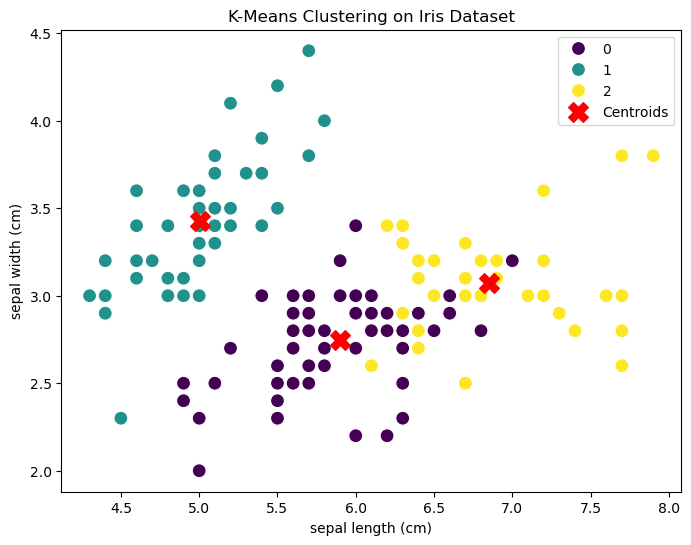

In [11]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

In [ ]:
#The Iris dataset has a natural hierarchical structure, making it useful for hierarchical clustering.
#It does not require specifying K in advance, unlike K-Means.

In [ ]:
#K-Means Clustering is an unsupervised machine learning algorithm used to partition data into K clusters. 
#It is a centroid-based clustering algorithm that iteratively assigns data points to clusters to minimize intra-cluster variance.steps include
#Select K (number of clusters).
#Randomly initialize K cluster centers.
#Assign each data point to the nearest cluster center (based on Euclidean distance).
#Recalculate the cluster centers as the mean of assigned points.
#Repeat steps 3-4 until cluster centers no longer change or a set number of iterations is reached

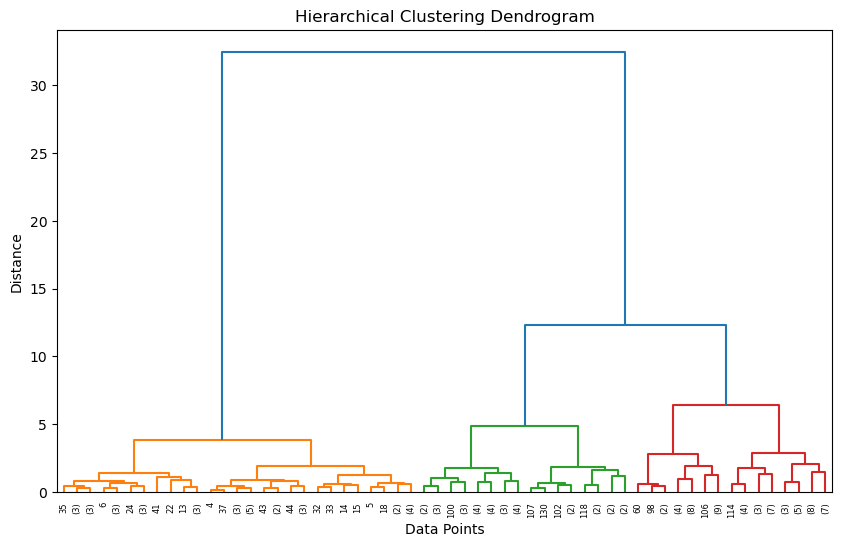

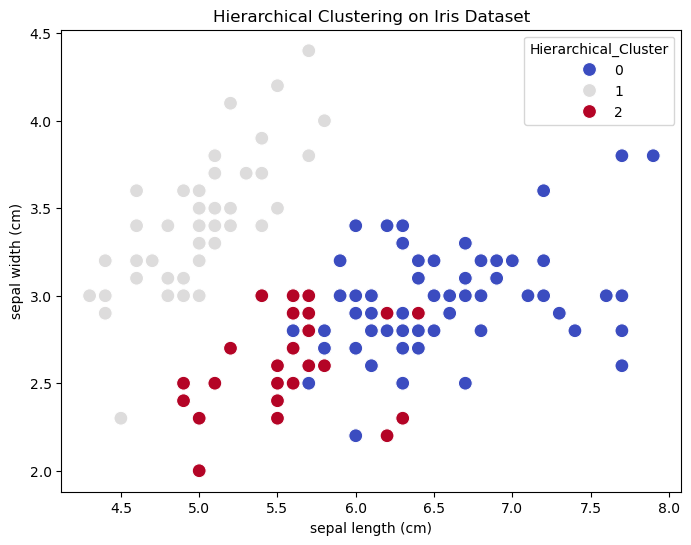

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_matrix = linkage(df.iloc[:, :-1], method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = agg_clust.fit_predict(df.iloc[:, :-2])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette='coolwarm', s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Hierarchical Clustering on Iris Dataset")
plt.show()


In [ ]:
#Hierarchical Clustering is an unsupervised machine learning algorithm used to group data into a hierarchy of clusters.
#Unlike K-Means, it does not require specifying the number of clusters (K) in advance. 
#Instead, it builds a tree-like structure (dendrogram) to show how data points merge or split over different levels.steps include

#Agglomerative (bottom-up approach): Start with each data point as its own cluster, then iteratively merge the closest clusters.
#Divisive (top-down approach): Start with one large cluster and recursively split it.
#Agglomerative clustering is commonly used with distance metrics 

#Single linkage: Minimum distance between points in clusters.
#Complete linkage: Maximum distance between points in clusters.
#Average linkage: Mean distance between points in clusters

In [ ]:
#Both algorithms successfully cluster the Iris dataset into three groups. 
#K-Means is more efficient, while Hierarchical Clustering provides insight into the data structure.